In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']= 120


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
import xgboost as xgb


In [2]:
#/content/SUSY.csv.gz
#print(os.listdir('/content'))
if 'SUSY.csv' in os.listdir('/content'):
  print('file exists')
else:
  print('file downloading')
  !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
  !gzip -d SUSY.csv.gz
# Link to dataset: http://archive.ics.uci.edu/ml/datasets/SUSY
# 0: background
# 1: signal


file downloading
--2022-11-08 07:31:27--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922377711 (880M) [application/x-httpd-php]
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz         100%[===================>] 879.65M  22.2MB/s    in 40s     

2022-11-08 07:32:07 (21.8 MB/s) - ‘SUSY.csv.gz’ saved [922377711/922377711]



In [3]:
df = pd.read_csv('SUSY.csv')
df.columns = ["label","lepton1-pT", "lepton1-eta", "lepton1-phi", "lepton2-pT", "lepton2-eta", "lepton2-phi", "missing-energy-magnitude", "missing-energy-phi", "MET-rel", "axial-MET", "MR", "MTR2", "R", "MT2", "SR", "MDeltaR", "dPhirb", "cos(thetar1)"]
df


,label,lepton1-pT,lepton1-eta,lepton1-phi,lepton2-pT,lepton2-eta,lepton2-phi,missing-energy-magnitude,missing-energy-phi,MET-rel,axial-MET,MR,MTR2,R,MT2,SR,MDeltaR,dPhirb,cos(thetar1)
0,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
2,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
3,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
4,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999994,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999995,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999996,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999997,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [4]:
signal = df.loc[df['label']==1]
background = df.loc[df['label']==0]


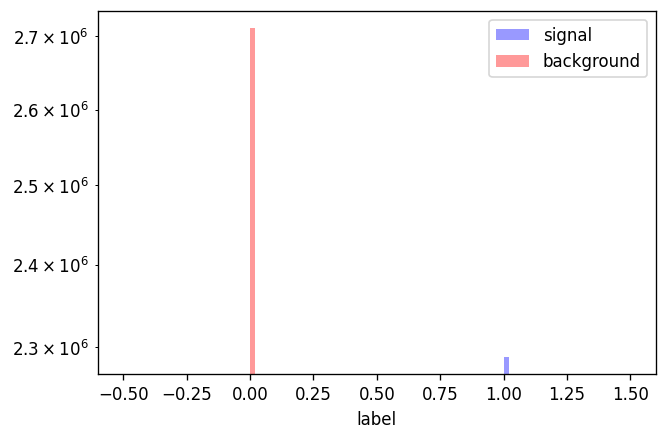

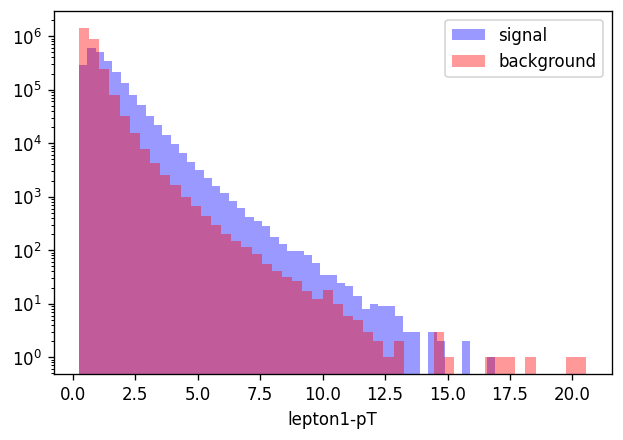

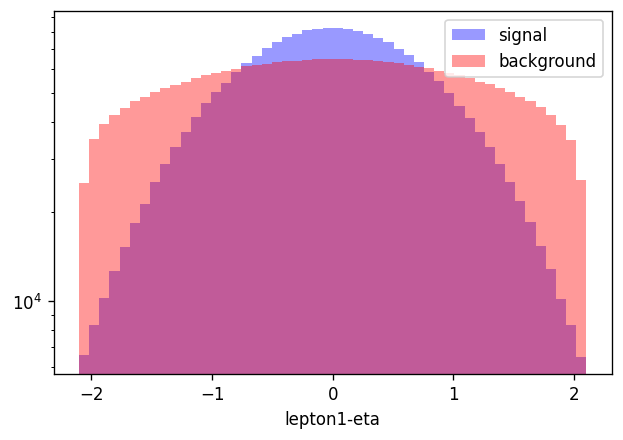

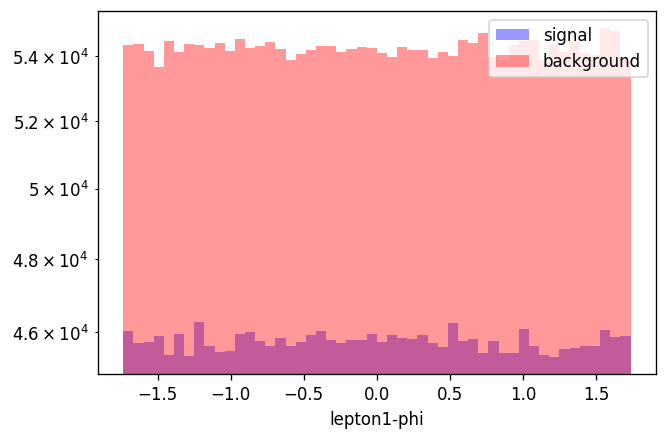

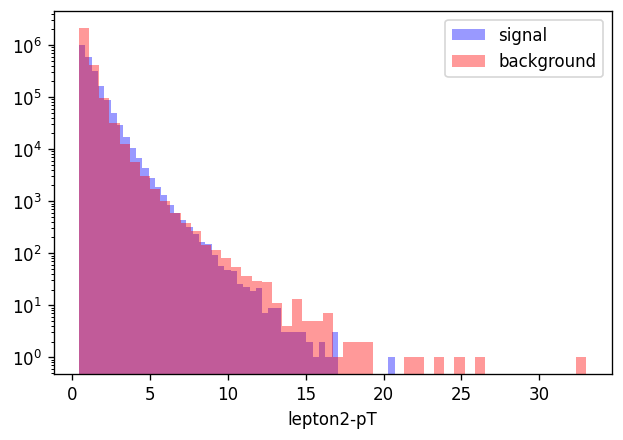

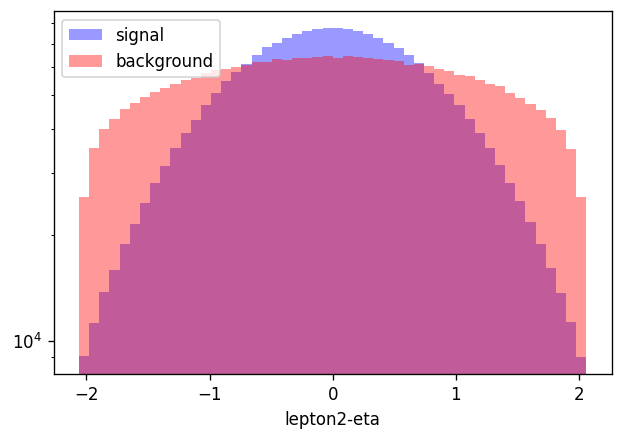

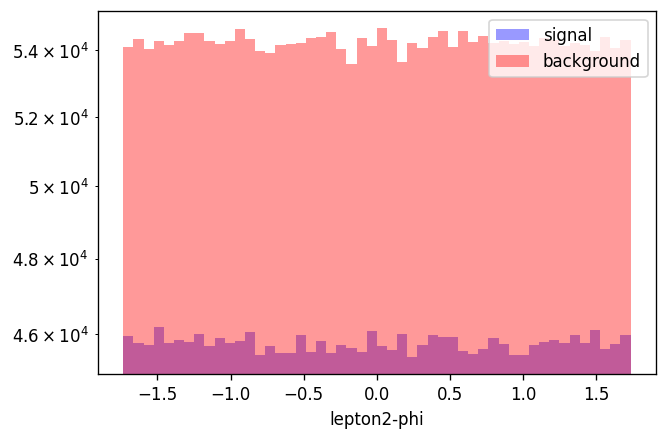

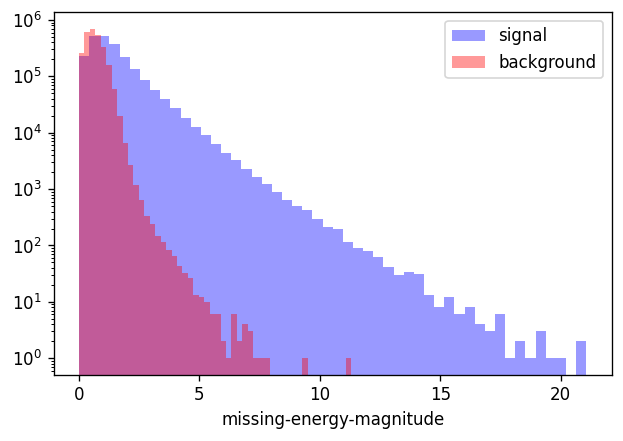

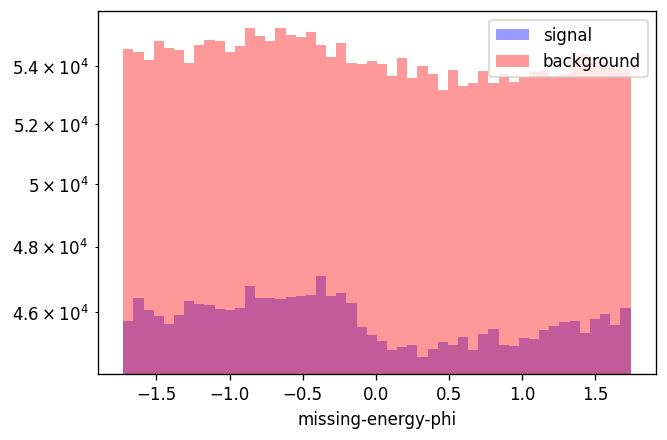

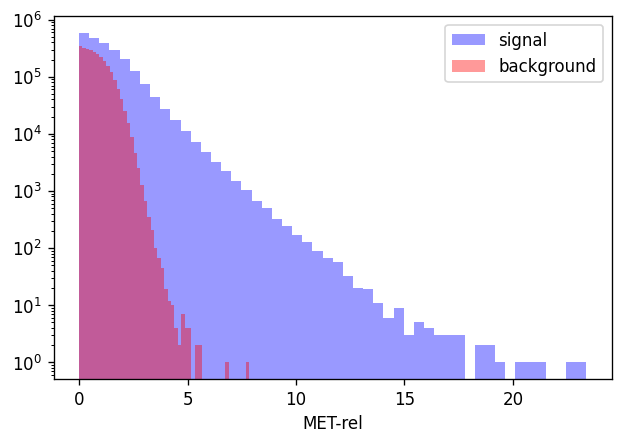

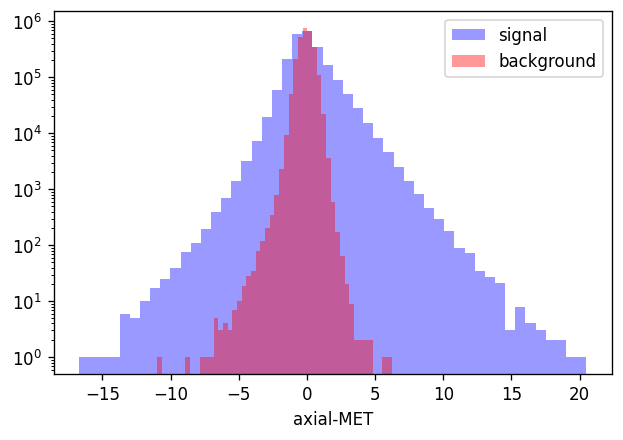

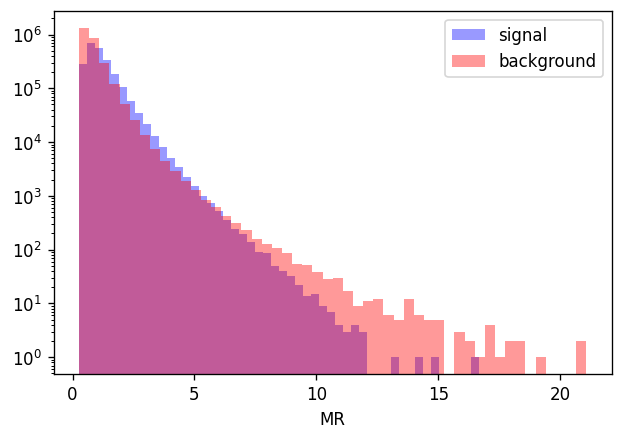

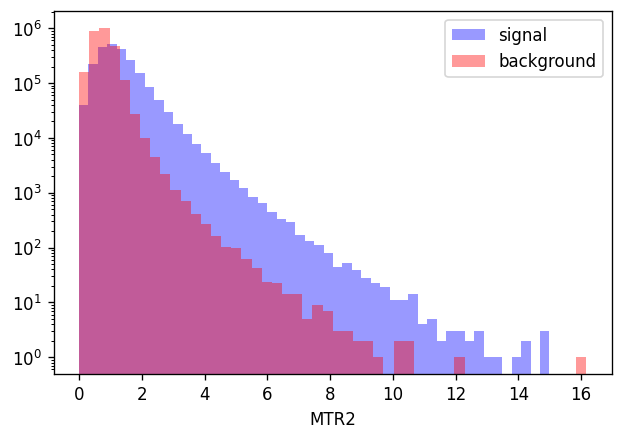

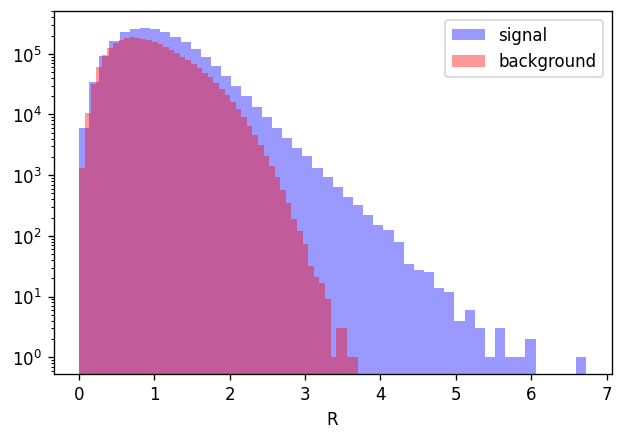

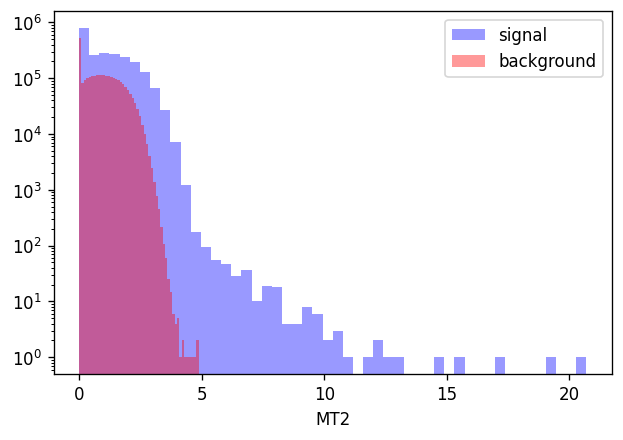

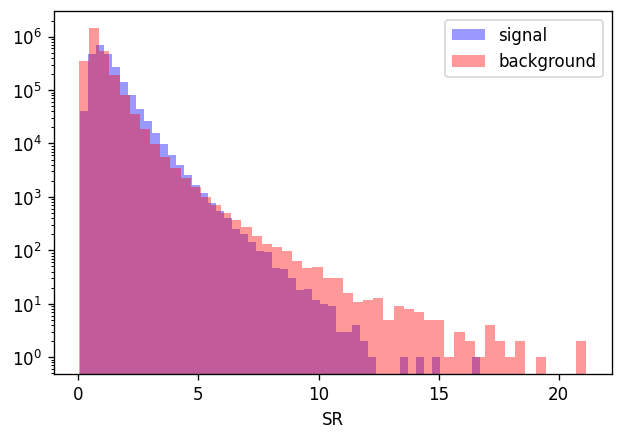

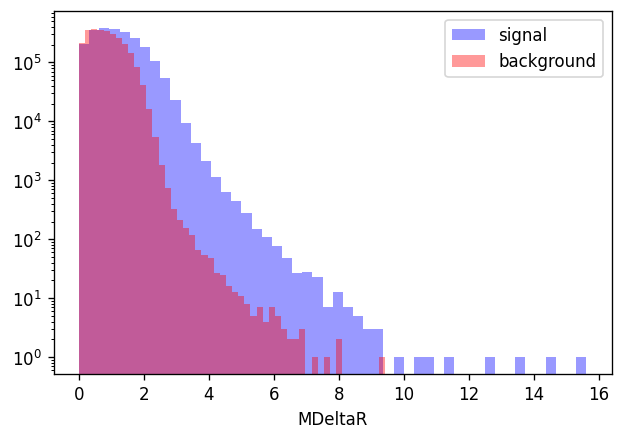

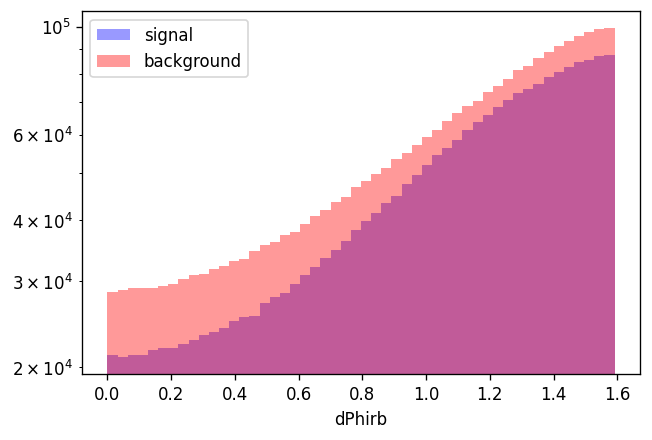

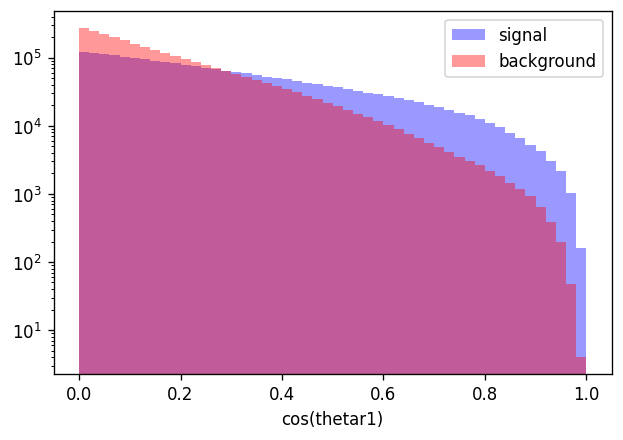

In [5]:
for col in df.columns:
  plt.hist(signal[col], alpha=0.4,bins=50,color='b',label='signal')#  range=[min,max]
  plt.hist(background[col],alpha=0.4,bins=50,color='r',label='background')#,range=[min,max]
  plt.xlabel(col)
  plt.yscale('log')
  plt.legend() 
  plt.show()


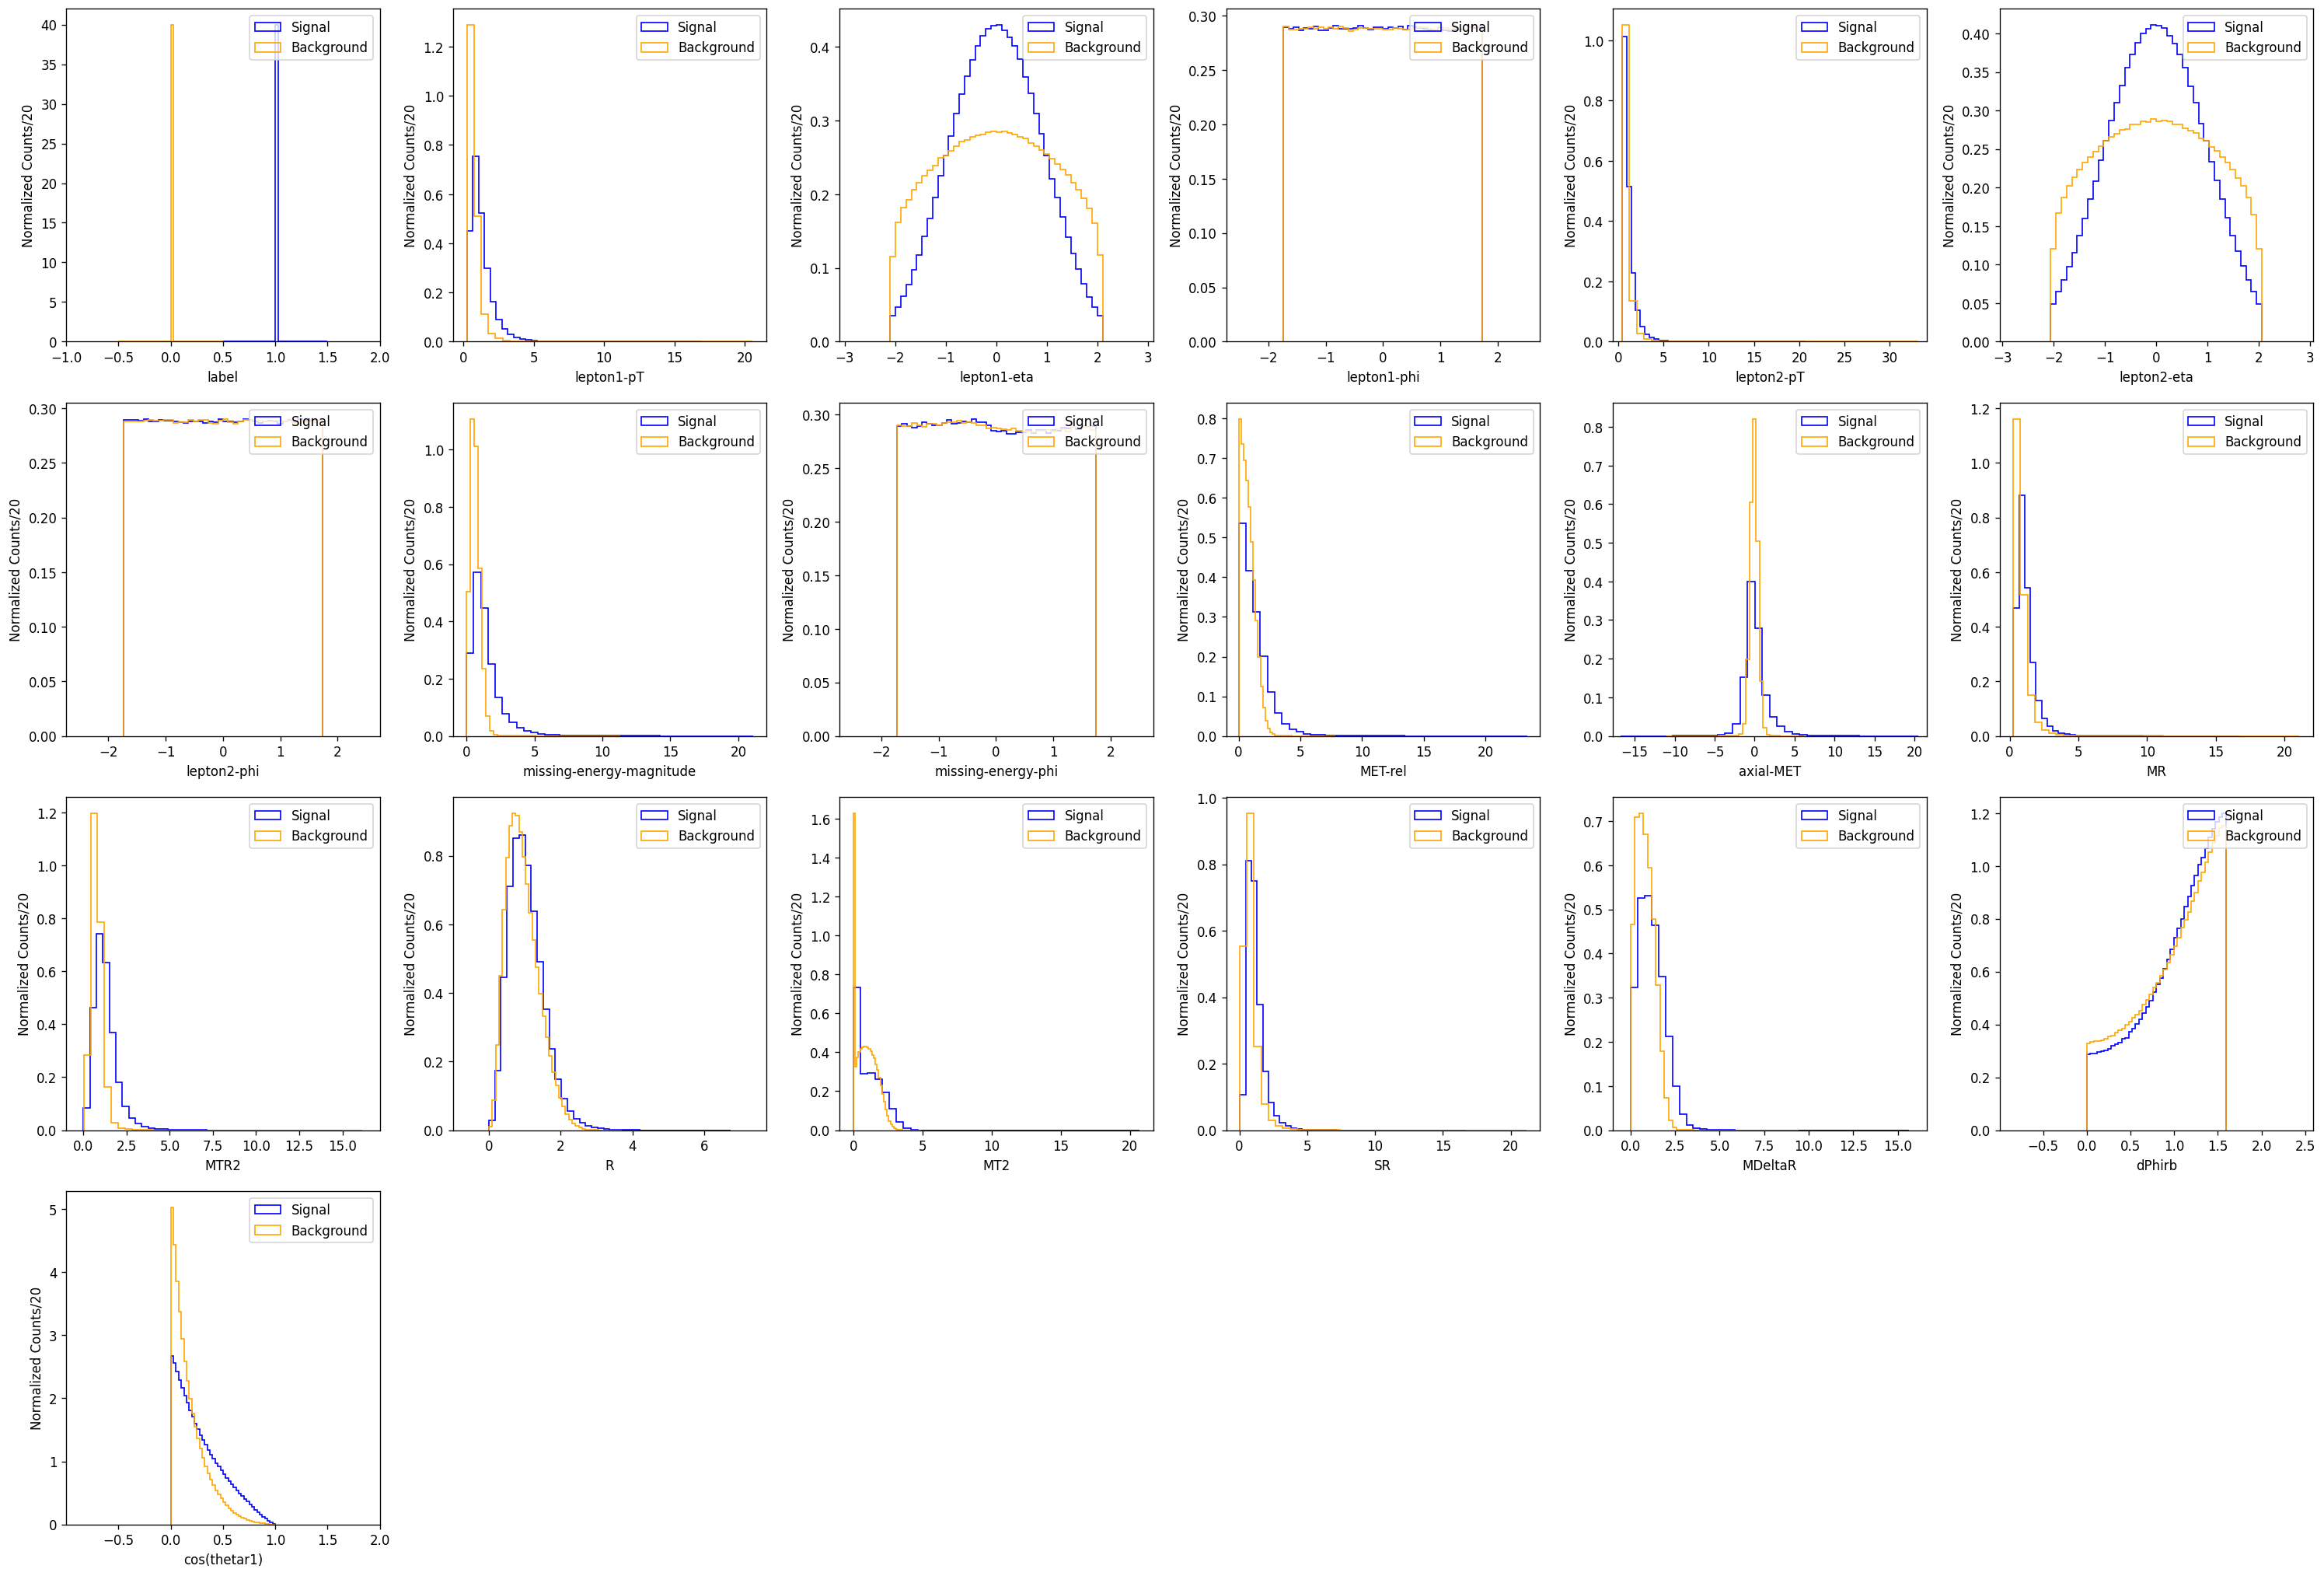

In [6]:
def draw_sig_vs_bkg(data,signal,background):
    fig  = plt.figure(figsize=(25,25))
    i=0
    for var in signal.columns:
        plt.subplot(6,6,i+1)
        #if data.loc[data[var]==-999]:
        #    continue
        plt.hist(signal[var],color='blue',histtype='step',density=True,bins=40,label="Signal")
        plt.hist(background[var],color='orange',histtype='step',density=True,bins=40,label="Background")
        plt.xlabel(var)
        plt.legend()
        plt.ylabel('Normalized Counts/20')
        if var != 'Label':
            plt.xlim(min(data[var])-1,max(data[var])+1)
        i = i + 1
    fig.tight_layout()

draw_sig_vs_bkg(df,signal,background)
